In [21]:
import matplotlib.pyplot as plt
import numpy as np
import numba as nb
from classy import Class
import Num_SH_fast

from Emma3 import sterile_production

## Plots needed:
1. Just mu spectra and lep evo... Using this to explain features of spectra and lepton evo
2. One-to-one model spectra and lep evo with equal $L_0$ and $\sin^22\theta$ values... Using this to explain the first type of model we have (transformation in one channel). As well as the similarities ini e and mu vs tau.
3. Three-to-one model spectra and lep evo lep evo with equal $L_0$ and $\sin^22\theta$ values... Using this to explain the second type of model we have (transformation in all three channels). 
4. ROW PLOT for Lepton number. with varying $L_0$ and constant $\sin^22\theta$ values... use this to show the effect of increasing the lepton number on the dark matter spectrum
5. ROW PLOT for mixing angle. with varying $\sin^22\theta$ and constant $L_0$... use this to show the effect of increasing the mixing angle on the dark matter spectrum
6. Matter power spectrum... using this to lead into subhalo count
7. Dark mattter contour... use this to talk about fraction, total mixing angle, and results
8. Scatter plot with $\sin^22\theta$ vs. fraction and colors showing subahlos... using this to show what astrophysical mixing angle would be observed as the sterile neutrino fraction increases in the dark matter, as well as how the subhalo count changes as the fraction increases. 

### Colors:
one-to-one model: 
- electron: color = '#008185'
- muon: color = '#5CBE00'(--)
- tau: color = '#0B3760' (:)

three-to-one mode:
- $f_{\epsilon}$: color = '#5CBE00'(--)
- $\overline f_{\epsilon}$: color = '#0B3760' (:)
- $f_{\epsilon} + \overline f_{\epsilon}$: color = '#008185'

In [2]:
mixing = 5.33e-10
L0 = 0.0012

## 1. Just mu

Step 1: Choose model

In [3]:
sterile_production(1000, 0.0071, 0, mixing, 0, L0, L0, L0, make_plot=False, folder_name="JustMu", file_prefix="finaljustmu")




0.026897284947852602

Step 2: Load data

In [4]:
datam = np.load('JustMu/finaljustmux1.20e-03x5.33e-10.npz') 


Step 3: Plot spectra

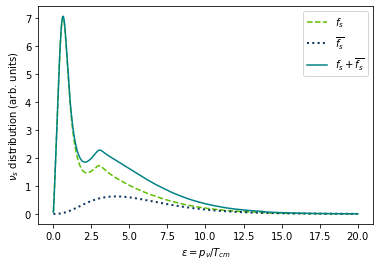

In [12]:
plt.figure()
plt.plot(datam['epsilon'],datam['epsilon']**2 * datam['sterile_evo'][-1]*2000, linestyle = '--', color = '#5CBE00')
plt.plot(datam['epsilon'],datam['epsilon']**2 * datam['anti_sterile_evo'][-1]*2000, linestyle = ':', linewidth=2, color = '#0B3760')
plt.plot(datam['epsilon'],datam['epsilon']**2 * datam['final_distribution']*2000, color = '#008185')

plt.legend(['$f_{s}$', '$\overline{f_{s}}$', '$f_{s} +\overline{f_{s}}$ '], fontsize=10)

plt.xlabel("Scaled Energy", fontsize=15)
plt.xlabel(r"$\epsilon = p_\nu / T_{cm}$", fontsize=10)
plt.ylabel(r"$\nu_s$ distribution (arb. units)", fontsize=10)
plt.savefig('justmu-Spectra.pdf')
image_format = 'png' # e.g .png, .svg, etc.
image_name = 'justmu-Spectra.png'
plt.savefig(image_name, format=image_format, dpi=1200)

Step 4: Plot lepton evo

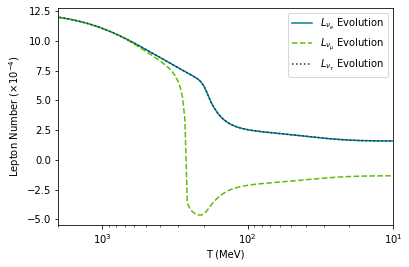

In [11]:
plt.figure()
plt.semilogx(datam['T'], 10**4*datam['lep_evo_e'], color = '#008185')
plt.semilogx(datam['T'], 10**4*datam['lep_evo_mu'], linestyle = '--', color = '#5CBE00')
plt.semilogx(datam['T'], 10**4*datam['lep_evo_tau'], linestyle = ':', color = '#0B3760')
plt.legend([r'$L_{\nu_e}$ Evolution', r'$L_{\nu_{\mu}}$ Evolution', r'$L_{\nu_{\tau}}$ Evolution'], fontsize=10)
plt.xlim(2000,10)
plt.xlabel("T (MeV)")
plt.ylabel(r"Lepton Number $(\times 10^{-4})}$")
plt.savefig("justmu-LepEvo.pdf")
image_format = 'png' # e.g .png, .svg, etc.
image_name = 'justmu-LepEvo.png'
plt.savefig(image_name, format=image_format, dpi=1200)

## 2. One-to-one Model

In [8]:
#Step 1
sterile_production(1000, 0.0071, mixing, 0, 0, L0, L0, L0, make_plot=False, folder_name="1to1 model", file_prefix="e-final1to1")
sterile_production(1000, 0.0071, 0, mixing, 0, L0, L0, L0, make_plot=False, folder_name="1to1 model", file_prefix="m-final1to1")
sterile_production(1000, 0.0071, 0, 0, mixing, L0, L0, L0, make_plot=False, folder_name="1to1 model", file_prefix="t-final1to1")


0.02626106317562054

In [9]:
#Step 2
edata = np.load('1to1 model/e-final1to1x1.20e-03x5.33e-10.npz')
mudata = np.load('1to1 model/m-final1to1x1.20e-03x5.33e-10.npz')
taudata = np.load('1to1 model/t-final1to1x1.20e-03x5.33e-10.npz')

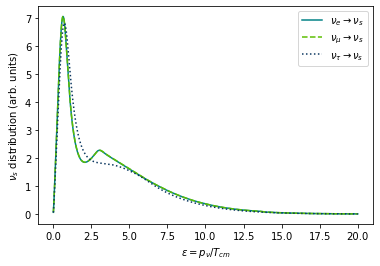

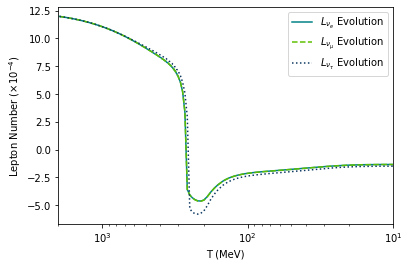

In [10]:
#Step 3 and 4
plt.figure()
plt.plot(edata['epsilon'],edata['epsilon']**2 * edata['final_distribution']*2000,  color = '#008185')
plt.plot(mudata['epsilon'],mudata['epsilon']**2 * mudata['final_distribution']*2000, linestyle = '--', color = '#5CBE00')
plt.plot(taudata['epsilon'],taudata['epsilon']**2 * taudata['final_distribution']*2000, linestyle = ':', color = '#0B3760')
plt.legend([r'$\nu_{e} \rightarrow \nu_{s}$ ', r'$\nu_{\mu} \rightarrow \nu_{s}$ ', r'$\nu_{\tau} \rightarrow \nu_{s}$ '])

plt.xlabel(r"$\epsilon = p_\nu / T_{cm}$", fontsize=10)
plt.ylabel(r"$\nu_s$ distribution (arb. units)", fontsize=10)
plt.savefig("1to1-Spectra.pdf")
image_format = 'png' # e.g .png, .svg, etc.
image_name = '1to1-Spectra.png'
plt.savefig(image_name, format=image_format, dpi=1200)


plt.figure()
plt.semilogx(edata['T'], 10**4*edata['lep_evo_e'], color = '#008185')
plt.semilogx(mudata['T'], 10**4*mudata['lep_evo_mu'], linestyle = '--', color = '#5CBE00')
plt.semilogx(taudata['T'], 10**4*taudata['lep_evo_tau'], linestyle = ':', color = '#0B3760')
plt.legend([r'$L_{\nu_e}$ Evolution', r'$L_{\nu_{\mu}}$ Evolution', r'$L_{\nu_{\tau}}$ Evolution'])
plt.xlim(2000,10)
plt.xlabel("T (MeV)")
plt.ylabel(r"Lepton Number $(\times 10^{-4})}$")
plt.savefig("1to1-LepEvo.pdf")
image_format = 'png' # e.g .png, .svg, etc.
image_name = '1to1-LepEvo.png'
plt.savefig(image_name, format=image_format, dpi=1200)


## 3. Three-to-one Model

In [13]:
#Step 1
sterile_production(1000, 0.0071, mixing, mixing, mixing, L0, L0, L0, make_plot=False, folder_name="3to1 model", file_prefix="final3to1")


0.061031740016825944

In [14]:
#Step 2
data = np.load('3to1 model/final3to1x1.20e-03x1.60e-09.npz') 
data.files
print (data['omega_h2'])

0.061031740016825944


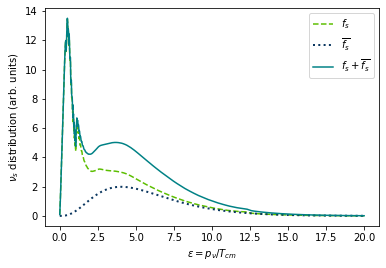

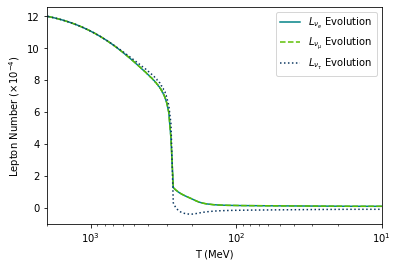

In [15]:
#Step 3 and 4
plt.figure()
plt.plot(data['epsilon'],data['epsilon']**2 * data['sterile_evo'][-1]*2000, linestyle = '--', color = '#5CBE00')
plt.plot(data['epsilon'],data['epsilon']**2 * data['anti_sterile_evo'][-1]*2000, linestyle = ':', linewidth=2, color = '#0B3760')
plt.plot(data['epsilon'],data['epsilon']**2 * data['final_distribution']*2000, color = '#008185')

plt.legend(['$f_{s}$', '$\overline{f_{s}}$', '$f_{s} +\overline{f_{s}}$ '], fontsize=10)

plt.xlabel(r"$\epsilon = p_\nu / T_{cm}$", fontsize=10)
plt.ylabel(r"$\nu_s$ distribution (arb. units)", fontsize=10)
plt.savefig("3to1-Spectra.pdf")
image_format = 'png' # e.g .png, .svg, etc.
image_name = '3to1-Spectra.png'
plt.savefig(image_name, format=image_format, dpi=1200)


plt.figure()
plt.semilogx(data['T'], 10**4*data['lep_evo_e'], color = '#008185')
plt.semilogx(data['T'], 10**4*data['lep_evo_mu'], linestyle = '--', color = '#5CBE00')
plt.semilogx(data['T'], 10**4*data['lep_evo_tau'], linestyle = ':', color = '#0B3760')
plt.legend([r'$L_{\nu_e}$ Evolution', r'$L_{\nu_{\mu}}$ Evolution', r'$L_{\nu_{\tau}}$ Evolution'], fontsize=10)
plt.xlim(2000,10)
plt.xlabel("T (MeV)")
plt.ylabel(r"Lepton Number $(\times 10^{-4})}$")
plt.savefig("3to1-LepEvo.pdf")
image_format = 'png' # e.g .png, .svg, etc.
image_name = '3to1-LepEvo.png'
plt.savefig(image_name, format=image_format, dpi=1200)


## 4. Row Plot for Lepton Number

In [17]:
mix_vals = [10**(-11.5), 10**(-11), 10**(-10.5), 10**(-10), 10**(-9.5)]
lep_vals = [7e-4, 11e-4, 13e-4, 15e-4, 17e-4]

for mix in mix_vals:
    for lep in lep_vals:
        sterile_production(1000, 0.0071, mix, mix, mix, lep, lep, lep, make_plot=False, folder_name="3to1 model", file_prefix="3nu")

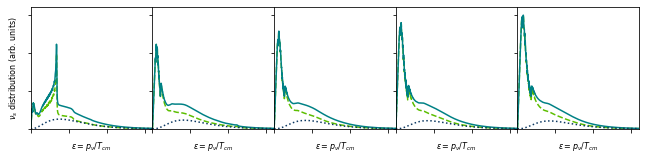

In [18]:
lep_vals = [7e-4, 11e-4, 13e-4, 15e-4, 17e-4]

plt.figure(figsize=(10,10))
 
for i, lep in enumerate(lep_vals):
    mixing_angle  = np.format_float_scientific(mix*3, precision = 2, unique=False)
    lepton_number = np.format_float_scientific(lep, precision = 2, unique=False)
    file_name = '3nu' + 'x' + lepton_number +'x'+ mixing_angle
    data_file = '3to1 model' + '/' + file_name + '.npz'
    data = np.load(data_file)
 
    ax = plt.axes([0.05+0.03+0.169*i,0.169,0.169,0.169])
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.set_ylim([0,16])
    ax.set_xlim([0,16])

        #ax.plot(data['epsilon'],data['epsilon']**2 * data['final_distribution']*2000)
    ax.plot(data['epsilon'],data['epsilon']**2 * data['sterile_evo'][-1]*2000, linestyle = '--', linewidth=1.5, color = '#5CBE00')
    ax.plot(data['epsilon'],data['epsilon']**2 * data['final_distribution']*2000, color = '#008185')
    ax.plot(data['epsilon'],data['epsilon']**2 * data['anti_sterile_evo'][-1]*2000, linestyle = ':', color = '#0B3760')
    ax.set_xlabel(r"$\epsilon = p_\nu / T_{cm}$", fontsize = 8)
    if i == 0:
        ax.set_ylabel(r"$\nu_s$ distribution (arb. units)", fontsize = 8)
plt.savefig("rowplotlep.pdf")
image_format = 'png' # e.g .png, .svg, etc.
image_name = 'rowplotlep.png'
plt.savefig(image_name, format=image_format, dpi=1200)

## 5. Row Plot for Mixing Angle 

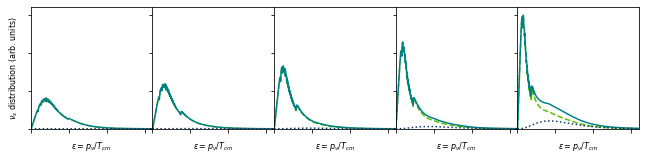

In [20]:
#do the row of 5 for mixangle #

mix_vals = [10**(-11.5), 10**(-11), 10**(-10.5), 10**(-10), 10**(-9.5)]
lep_vals = [7e-4, 11e-4, 13e-4, 15e-4, 17e-4]

plt.figure(figsize=(10,10))

for i, mix in enumerate(mix_vals):
    mixing_angle  = np.format_float_scientific(mix*3, precision = 2, unique=False)
    lepton_number = np.format_float_scientific(lep, precision = 2, unique=False)
    file_name = '3nu' + 'x' + lepton_number +'x'+ mixing_angle
    data_file = '3to1 model' + '/' + file_name + '.npz'
    data = np.load(data_file)
 
    ax = plt.axes([0.05+0.03+0.169*i,0.169,0.169,0.169])
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.set_ylim([0,16])
    ax.set_xlim([0,16])

        #ax.plot(data['epsilon'],data['epsilon']**2 * data['final_distribution']*2000)
    ax.plot(data['epsilon'],data['epsilon']**2 * data['sterile_evo'][-1]*2000, linestyle = '--', linewidth=1.5, color = '#5CBE00')
    ax.plot(data['epsilon'],data['epsilon']**2 * data['final_distribution']*2000, color = '#008185')
    ax.plot(data['epsilon'],data['epsilon']**2 * data['anti_sterile_evo'][-1]*2000, linestyle = ':', color = '#0B3760')
    ax.set_xlabel(r"$\epsilon = p_\nu / T_{cm}$", fontsize = 8)
    if i == 0:
        ax.set_ylabel(r"$\nu_s$ distribution (arb. units)", fontsize = 8)
plt.savefig("rowplotmix.pdf")
image_format = 'png' # e.g .png, .svg, etc.
image_name = 'rowplotmix.png'
plt.savefig(image_name, format=image_format, dpi=1200)

## 6. Matter Power Spectrum

In [22]:
#calculate
mixangv_e = 5.33e-10
mixangv_mu = 5.33e-10
mixangv_tau = 5.33e-10

Le0 = 0.0012
Lmu0 = 0.0012
Ltau0 = 0.0012

Num_SH_fast.solve(mixangv_e, mixangv_mu, mixangv_tau, Le0, Lmu0, Ltau0, "3to1 model", 'MPS', N=1000, make_plot=False)


(0.061031740016825944, 79.15367220577293)

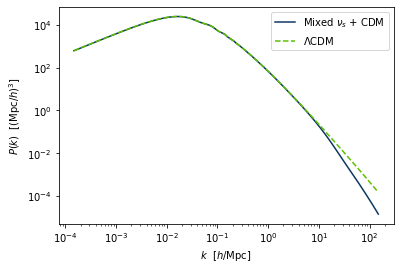

In [23]:
cl = np.load("3to1 model/MPSx1.20e-03x1.60e-09-CLASS.npz", allow_pickle=True)
cdm = np.load('LambdaCDM_results.npz', allow_pickle=True)
d = cl['Class_values'].item()
lam = cdm['Class_values'].item()

k = d['k']
pk = np.array(d['pk'])
h = d['h']

k_l = lam['k']
pk_l = np.array(lam['pk'])
h_l = lam['h']


plt.figure(figsize=(6,4))
plt.loglog(k/h, pk*h**3, color = '#0B3760')
plt.loglog(k_l/h_l, pk_l*h_l**3, linestyle = '--', color = '#5CBE00')
plt.legend([r"Mixed $\nu_s$ + CDM", "$\Lambda$CDM"])
plt.xlabel(r"$k$  [$h$/Mpc]")
plt.ylabel(r"$P(k)$  [(Mpc/$h)^3$]")
plt.savefig("mps.pdf")
image_format = 'png' # e.g .png, .svg, etc.
image_name = 'mps.png'
plt.savefig(image_name, format=image_format, dpi=1200)

## 7. Dark Matter Contour

In Desktop $\rightarrow$ Data $\rightarrow$ AnalyzeParallelRuns

## 8. Scatter Plot

In Desktop $\rightarrow$ Data $\rightarrow$ AnalyzeParallelRuns